In [1]:
import pandas as pd
import numpy as np
import os
import re
import string
import warnings
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,GlobalMaxPooling1D, Flatten,BatchNormalization, Dense,SimpleRNN 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Bidirectional
from tensorflow.keras.utils import array_to_img
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenize
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_ins = pd.read_csv("data.csv")


In [3]:
cat_df = df_ins[['gender', 'diabetic', 'children', 'smoker', 'region']]
num_df = df_ins[['age', 'bmi', 'bloodpressure', 'claim']]
le = LabelEncoder ()
cat_df = df_ins.select_dtypes(exclude=["int", "float"])
for i in cat_df:
    cat_df[i] = le.fit_transform(df_ins[i])
num_df = df_ins.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

In [4]:
x = df_ins.drop(['gender'], axis=1)
y = df_ins ['gender']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(x_train.shape)
print(y_train.shape)

(938, 10)
(938,)


In [5]:
model = Sequential()
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.add(layers.Flatten())
model.build(input_shape=(None, 2)) 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


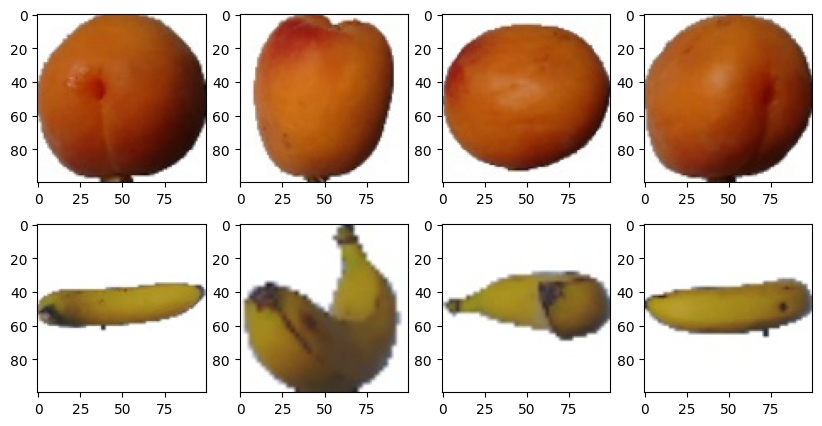

In [8]:
src_path = "C:\\лаб3\\data\\train"
sub_class = os.listdir(src_path)
fig = plt.figure(figsize=(10,5))
path = os.path.join(src_path,sub_class[0])
for i in range(4):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,str(i)+'.jpg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

path = os.path.join(src_path,sub_class[1])
for i in range(4,8):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,str(i)+'.jpg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [13]:
valid_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [15]:
batch_size = 8
train_generator = train_datagen.flow_from_directory(
    directory=src_path,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = valid_datagen.flow_from_directory(
    directory=src_path,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=src_path,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [16]:
from keras.models import Sequential
from keras.applications import ResNet101V2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
convlayer = ResNet101V2(input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
for layer in convlayer.layers:
    layer.trainable = False
model = Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='softmax'))

print(model.summary())

171317808/171317808 [==============================] - 15s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 2048)              205522944 
                                                                 
 batch_normalization_1 (Batc  (None, 2048)          

In [18]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [19]:
model = prepare_model()
model.fit_generator(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=5)

Epoch 1/5
10/10 [==============================] - 4s 205ms/step - loss: 0.2251 - accuracy: 0.9000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 2/5
10/10 [==============================] - 1s 125ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.8048e-04 - val_accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 1s 119ms/step - loss: 2.5280e-04 - accuracy: 1.0000 - val_loss: 9.6368e-05 - val_accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 1s 138ms/step - loss: 5.3287e-05 - accuracy: 1.0000 - val_loss: 2.8146e-05 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 1s 134ms/step - loss: 2.2777e-05 - accuracy: 1.0000 - val_loss: 1.1741e-05 - val_accuracy: 1.0000


In [20]:
score = model.evaluate_generator(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.258336578757735e-05
Test accuracy: 1.0


In [21]:
sms_spam_collection = pd.read_csv('spam.csv', sep='\t', header=None, names=['Label', 'SMS'], encoding='windows-1252')
sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.replace('\W', ' ')
sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.lower()
sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.split()

In [22]:

x = sms_spam_collection['SMS'].values
y = sms_spam_collection['Label'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
dictionary_length = 1000
input_length = 100
tokenizer = Tokenizer(num_words=dictionary_length)
tokenizer.fit_on_texts(sms_spam_collection.SMS.values)
post_seq = tokenizer.texts_to_sequences(sms_spam_collection.SMS.values)
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)
from sklearn.utils import shuffle
x_original = post_seq_padded
x_original = np.array(x_original)
y_original = sms_spam_collection['SMS'].values
y_original = 1 * (y_original == 'spam')
y_original = np.array(y_original)
x, y = shuffle(x_original, y_original, random_state=23)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=25)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=25)
from keras.layers import Embedding, Dense, Bidirectional, SimpleRNN
model = Sequential()
model.add(Embedding(dictionary_length, 2, input_length=input_length))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 2)            2000      
                                                                 
 dense_8 (Dense)             (None, 100, 32)           96        
                                                                 
 dense_9 (Dense)             (None, 100, 32)           1056      
                                                                 
 bidirectional (Bidirectiona  (None, 100, 32)          1568      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 32)          1568      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)              

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=256, verbose=1, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
13/13 [==============================] - 19s 384ms/step - loss: 0.1389 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 2/5
13/13 [==============================] - 3s 217ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 3/5
13/13 [==============================] - 3s 224ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 4/5
13/13 [==============================] - 3s 215ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 3s 214ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000


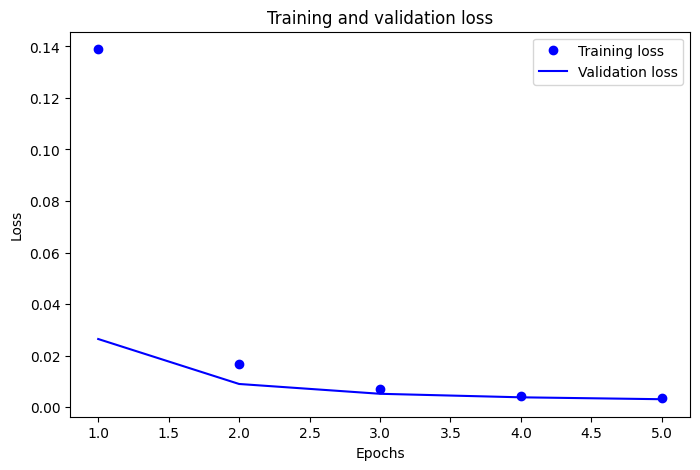

In [24]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()